### Packages & helper functions

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix

In [1]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)

NameError: name 'matplotlib' is not defined

In [ ]:
def plot_cm(y_true, y_pred, figsize=(6,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

### 1 - Prepare data

In [4]:
data = pd.read_csv('vne_content_giaoduc_dulich_test.csv')
data

,text,sentiment
0,6 địa chỉ ẩm thực thái ở sài gòn,du-lich
1,khách sạn 5 sao ưu đãi tiệc trà chiều,du-lich
2,người việt du lịch thế nào trong covid19 vnexp...,du-lich
3,2000 usd một đêm ngủ khách sạn di động chuyên ...,du-lich
4,thế khó của côn đảo khi mở rộng đường bay côn ...,du-lich
...,...,...
933,các địa phương chuẩn bị cho kỳ thi tốt nghiệp ...,giao-duc
934,sinh viên y dược huế hỗ trợ chống covid19 hơn ...,giao-duc
935,điểm chuẩn trung học thực hành sư phạm cao nhấ...,giao-duc
936,điểm chuẩn vào lớp 10 công lập ở hà nội chiều ...,giao-duc


### 2 - Apply TF-IDF on text

In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["text"]).toarray()
vocab = vectorizer.get_feature_names()

### 3 - Cluster data by k-means

In [6]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 2, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
data["kmeans_cluster"] = y_kmeans
data["kmeans_label"] = data.apply(lambda row: "giao-duc" if row["kmeans_cluster"] == 1 else "du-lich", axis=1)
data

,text,sentiment,kmeans_cluster,kmeans_label
0,6 địa chỉ ẩm thực thái ở sài gòn,du-lich,0,du-lich
1,khách sạn 5 sao ưu đãi tiệc trà chiều,du-lich,0,du-lich
2,người việt du lịch thế nào trong covid19 vnexp...,du-lich,0,du-lich
3,2000 usd một đêm ngủ khách sạn di động chuyên ...,du-lich,0,du-lich
4,thế khó của côn đảo khi mở rộng đường bay côn ...,du-lich,0,du-lich
...,...,...,...,...
933,các địa phương chuẩn bị cho kỳ thi tốt nghiệp ...,giao-duc,1,giao-duc
934,sinh viên y dược huế hỗ trợ chống covid19 hơn ...,giao-duc,0,du-lich
935,điểm chuẩn trung học thực hành sư phạm cao nhấ...,giao-duc,1,giao-duc
936,điểm chuẩn vào lớp 10 công lập ở hà nội chiều ...,giao-duc,1,giao-duc


In [8]:
confusion_matrix(data["sentiment"], data["kmeans_label"])

array([[238,   0],
       [459, 241]])

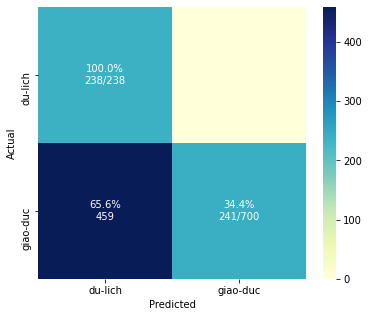

In [9]:
plot_cm(data["sentiment"], data["kmeans_label"])

### 4 - Cluster data by Hierarchy Agglomerative Clustering

In [1]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Bai bao')
plt.ylabel('Euclidean distances')
plt.show()

NameError: ignored

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hac

AgglomerativeClustering()

In [ ]:
y_hac = hac.fit_predict(X)
y_hac

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
data["hac_cluster"] = y_hac
data["hac_label"] = data.apply(lambda row: "giao-duc" if row["hac_cluster"] == 1 else "du-lich", axis=1)
data

,text,sentiment,kmeans_cluster,kmeans_label,hac_cluster,hac_label
0,6 địa chỉ ẩm thực thái ở sài gòn,du-lich,0,du-lich,0,du-lich
1,khách sạn 5 sao ưu đãi tiệc trà chiều,du-lich,0,du-lich,0,du-lich
2,người việt du lịch thế nào trong covid19 vnexp...,du-lich,0,du-lich,0,du-lich
3,2000 usd một đêm ngủ khách sạn di động chuyên ...,du-lich,0,du-lich,0,du-lich
4,thế khó của côn đảo khi mở rộng đường bay côn ...,du-lich,0,du-lich,0,du-lich
...,...,...,...,...,...,...
933,các địa phương chuẩn bị cho kỳ thi tốt nghiệp ...,giao-duc,1,giao-duc,1,giao-duc
934,sinh viên y dược huế hỗ trợ chống covid19 hơn ...,giao-duc,0,du-lich,0,du-lich
935,điểm chuẩn trung học thực hành sư phạm cao nhấ...,giao-duc,1,giao-duc,0,du-lich
936,điểm chuẩn vào lớp 10 công lập ở hà nội chiều ...,giao-duc,1,giao-duc,0,du-lich


In [ ]:
confusion_matrix(data["sentiment"], data["hac_label"])

array([[237,   1],
       [578, 122]])

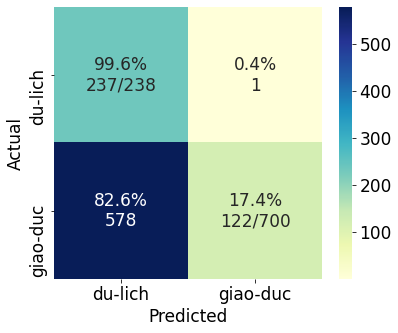

In [ ]:
plot_cm(data["sentiment"], data["hac_label"])